# Coursework #1

## Introduction

This coursework is concerned with building multi-layer networks to address the MNIST digit classification problem. It builds on the previous labs, in particular [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) in which single layer networks were trained for MNIST digit classification.   The course will involve extending that code to use Sigmoid and Softmax layers, combining these into multi-layer networks, and carrying out a number of MNIST digit classification experiments, to investigate the effect of learning rate, the number of hidden units, and the number of hidden layers.

The coursework is divided into 4 tasks:
* **Task 1**:   *Implementing a sigmoid layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Sigmoid`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 2**:  *Implementing a softmax layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Softmax`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 3**:  *Constructing a multi-layer network* - 40 marks.  
This task involves putting together a Sigmoid and a Softmax layer to create a multi-layer network, with one hidden layer (100 units) and one output layer, that is trained to classify MNIST digits.  This task will include reporting classification results, exploring the effect of learning rates, and plotting Hinton Diagrams for the hidden units and output units.
* **Task 4**:  *Experiments with different architectures*  - 30 marks.  
This task involves further MNIST classification experiments, primarily looking at the effect of using different numbers of hidden layers.
The coursework will be marked out of 100, and will contribute 30% of the total mark in the MLP course.

## Previous Tutorials

Before starting this coursework make sure that you have completed the first three labs:

* [00_Introduction.ipynb](00_Introduction.ipynb) - setting up your environment; *Solutions*: [00_Introduction_solution.ipynb](00_Introduction_solution.ipynb)
* [01_Linear_Models.ipynb](01_Linear_Models.ipynb) - training single layer networks; *Solutions*: [01_Linear_Models_solution.ipynb](01_Linear_Models_solution.ipynb)
* [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) - training a single layer network for MNIST digit classification

To ensure that your virtual environment is correct, please see [this note](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/kernel_issue_fix.md) on the GitHub.
## Submission
**Submission Deadline:  Thursday 29 October, 16:00** 

Submit the coursework as an ipython notebook file, using the `submit` command in the terminal on a DICE machine. If your file is `03_MLP_Coursework1.ipynb` then you would enter:

`submit mlp 1 03_MLP_Coursework1.ipynb` 

where `mlp 1` indicates this is the first coursework of MLP.

After submitting, you should receive an email of acknowledgment from the system confirming that your submission has been received successfully. Keep the email as evidence of your coursework submission.

**Please make sure you submit a single `ipynb` file (and nothing else)!**

**Submission Deadline:  Thursday 29 October, 16:00** 



## Getting Started
Please enter your exam number and the date in the next code cell.

In [ ]:
#MLP Coursework 1
#Exam number: B038579
#Date: 24/10/2015



Please run the next code cell, which imports `numpy` and seeds the random number generator.  Please **do not** modify the random number generator seed!

In [1]:
import numpy

#Seed a random number generator running the below cell, but do **not** modify the seed.
rng = numpy.random.RandomState([2015,10,10])
rng_state = rng.get_state()

## Task 1 - Sigmoid Layer (15%)

In this task you need to create a class `Sigmoid` which encapsulates a layer of sigmoid units.  You should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`), which implements a a layer of linear units (i.e. weighted sum plus bias).  The `Sigmoid` class extends this by applying the sigmoid transfer function to the weighted sum in the forward propagation, and applying the derivative of the sigmoid in the gradient descent back propagation and computing the gradients with respect to layer's parameters. Do **not** copy the implementation provided in `Linear` class but rather, **reuse** it through inheritance.

When you have implemented `Sigmoid` (in the `mlp.layers` module), then please test it by running the below code cell.


In [3]:
from mlp.layers import Sigmoid

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49, 20, 20])

rng.set_state(rng_state)
sigm = Sigmoid(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = sigm.fprop(a)
deltas, ograds  = sigm.bprop(h=fp, igrads=b)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds


4.21941537867
26.7567492277
4.6106054685
[ 0.067  0.728  0.999  0.512  0.159  0.584  0.238  0.932]
[ -5.019  11.506   0.      0.012   0.012  11.262   4.93    4.054]
[ 1.518 -0.093 -0.703  0.532  1.96   1.397]


***
To include the `Sigmoid` code in the notebook please run the below code cell.  (The `%load` notebook command is used to load the source of the `Sigmoid` class from `mlp/layers.py`.)

In [ ]:
# %load -s Sigmoid mlp/layers.py
class Sigmoid(Linear):

    def __init__(self, idim, odim,
                 rng=None,
                 irange=0.1):

        super(Sigmoid, self).__init__(idim = idim, odim = odim, rng = rng)


        
    def fprop(self, inputs):
        """
        Implements a forward propagation through the i-th layer, that is
        some form of:
           a^i = xW^i + b^i
           h^i = f^i(a^i)
        with f^i, W^i, b^i denoting a non-linearity, weight matrix and
        biases of this (i-th) layer, respectively and x denoting inputs.

        :param inputs: matrix of features (x) or the output of the previous layer h^{i-1}
        :return: h^i, matrix of transformed by layer features
        """
        a = numpy.dot(inputs, self.W) + self.b
        # here f() is an sigmoid function
        return sigmoid(a)

    def bprop(self, h, igrads):
        """
        Implements a backward propagation through the layer, that is, given
        h^i denotes the output of the layer and x^i the input, we compute:
        dh^i/dx^i which by chain rule is dh^i/da^i da^i/dx^i
        x^i could be either features (x) or the output of the lower layer h^{i-1}
        :param h: it's an activation produced in forward pass
        :param igrads, error signal (or gradient) flowing to the layer, note,
               this in general case does not corresponds to 'deltas' used to update
               the layer's parameters, to get deltas ones need to multiply it with
               the dh^i/da^i derivative
        :return: a tuple (deltas, ograds) where:
               deltas = igrads * dh^i/da^i
               ograds = deltas \times da^i/dx^i
        """

        # since df^i/da^i = sigmoid(a^i)*(1-sigmoid(a^i)) (f is assumed sigmoid function),
        # deltas are in fact the same as igrads
        deltas = igrads * h * (1-h)
        ograds = numpy.dot(deltas, self.W.T)
        return deltas, ograds

    def get_name(self):
        return 'sigmoid'


## Task 2 - Softmax (15%)

In this task you need to create a class `Softmax` which encapsulates a layer of softmax units.  As in the previous task, you should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`).

When you have implemented `Softmax` (in the `mlp.layers` module), then please test it by running the below code cell.


In [2]:
from mlp.layers import Softmax

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([0, 0, 0, 0, 0, 0, 0, 1])

rng.set_state(rng_state)
softmax = Softmax(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = softmax.fprop(a)
deltas, ograds = softmax.bprop_cost(h=None, igrads=fp-b, cost=None)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds

    
import numpy


# Remove the below line if not running this code in an ipython notebook
# It's a special command allowing the notebook to display plots inline
%matplotlib inline
import matplotlib.pyplot as plt

x = numpy.linspace(0.0, 30, 100)
y1 = numpy.sin(x)
y2 = numpy.cos(x)

plt.plot(x, y1, lw=2, label=r'$\sin(x)$')
plt.plot(x, y2, lw=2, label=r'$\cos(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0.0, 2*numpy.pi)
plt.grid()
plt.show()

1.0
0.0
0.0744177068753
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04   8.671e-03]
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04  -9.913e-01]
[-0.089  0.03   0.079  0.011  0.017  0.027]


***
To include the `Softmax` code in the notebook please run the below code cell.  (The notebook `%load` command is used to load the source of the `Softmax` class from `mlp/layers.py`.)

In [ ]:
# %load -s Softmax mlp/layers.py
class Softmax(Linear):

    def __init__(self, idim, odim,
                 rng=None,
                 irange=0.1):

        super(Softmax, self).__init__(idim = idim, odim = odim, rng = rng)


        
    def fprop(self, inputs):
        """
        Implements a forward propagation through the i-th layer, that is
        some form of:
           a^i = xW^i + b^i
           h^i = f^i(a^i)
        with f^i, W^i, b^i denoting a non-linearity, weight matrix and
        biases of this (i-th) layer, respectively and x denoting inputs.

        :param inputs: matrix of features (x) or the output of the previous layer h^{i-1}
        :return: h^i, matrix of transformed by layer features
        """
        a = numpy.dot(inputs, self.W) + self.b
        # have to be careful with division due to the shape of different inputs
        if (inputs.shape == 1):
            softmax = numpy.divide(numpy.exp(a), numpy.sum(numpy.exp(a), axis = 0))
        else:
            softmax = numpy.divide(numpy.exp(a).T, numpy.sum(numpy.exp(a), axis = 1)).T
        return softmax
    
    def bprop_cost(self, h, igrads, cost):
        """
        Implements a backward propagation in case the layer directly
        deals with the optimised cost (i.e. the top layer)
        By default, method should implement a bprop for default cost, that is
        the one that is natural to the layer's output, i.e.:
        here we implement linear -> mse scenario
        :param h: it's an activation produced in forward pass
        :param igrads, error signal (or gradient) flowing to the layer, note,
               this in general case does not corresponds to 'deltas' used to update
               the layer's parameters, to get deltas ones need to multiply it with
               the dh^i/da^i derivative
        :param cost, mlp.costs.Cost instance defining the used cost
        :return: a tuple (deltas, ograds) where:
               deltas = igrads * dh^i/da^i
               ograds = deltas \times da^i/dx^i
        """

        
        if cost is None or cost.get_name() == 'ce':
            deltas = igrads
            ograds = numpy.dot(deltas, self.W.T)
            return deltas, ograds
        else:
            raise NotImplementedError('Softmax.bprop_cost method not implemented '
                                      'for the %s cost' % cost.get_name())


    def get_name(self):
        return 'softmax'


## Task 3 - Multi-layer network for MNIST classification (40%)

**(a)** (20%)  Building on the single layer linear network for MNIST classification used in lab [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb), and using the `Sigmoid` and `Softmax` classes that you implemented in tasks 1 and 2, construct and learn a model that classifies MNIST images and:
   * Has one hidden layer with a sigmoid transfer function and 100 units
   * Uses a softmax output layer to discriminate between the 10 digit classes (use the `mlp.costs.CECost()` cost)

Your code should print the final values of the error function and the classification accuracy for train, validation, and test sets (please keep also the log information printed by default by the optimiser). Limit the number of training epochs to 30. You can, of course, split your code across as many cells as you think is necessary.

In [1]:
# include here the complete code that constructs the model, performs training,
# and prints the error and accuracy for train/valid/test

import numpy
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

from mlp.layers import MLP, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

rng = numpy.random.RandomState([2015,10,10])

# define the model structure, here just one linear layer
# and mean square error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
model.add_layer(Softmax(idim=100, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.01, max_epochs=30)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
optimiser.train(model, train_dp, valid_dp)

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))


INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.344. Accuracy is 12.43%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.344. Accuracy is 12.92%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.214. Accuracy is 37.14%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.106. Accuracy is 56.92%
INFO:mlp.optimisers:Epoch 1: Took 5 seconds. Training speed 11261 pps. Validation speed 29412 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 1.978. Accuracy is 60.80%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 1.818. Accuracy is 67.05%
INFO:mlp.optimisers:Epoch 2: Took 5 seconds. Training speed 11236 pps. Validation speed 29412 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 1.659. Accuracy is 67.77%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 1.472. Accuracy is 73.56%
INFO:mlp.optimisers:Epoch 3: Took 5 seconds. Training speed 11161 pps. Va

**(b)** (10%) Investigate the impact of different learning rates $\eta \in \{0.5, 0.2, 0.1, 0.05, 0.01, 0.005\}$ on the convergence of the network training as well as the final accuracy:
   * Plot (on a single graph) the error rate curves for each learning rate as a function of training epochs for training set
   * Plot (on another single graph) the error rate curves as a function of training epochs for validation set
   * Include a table of the corresponding error rates for test set

The notebook command `%matplotlib inline` ensures that your graphs will be added to the notebook, rather than opened as additional windows.

INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.344. Accuracy is 12.43%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.344. Accuracy is 12.92%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.575. Accuracy is 83.56%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.294. Accuracy is 91.44%
INFO:mlp.optimisers:Epoch 1: Took 11 seconds. Training speed 5005 pps. Validation speed 14925 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.287. Accuracy is 91.67%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.237. Accuracy is 93.16%
INFO:mlp.optimisers:Epoch 2: Took 11 seconds. Training speed 4869 pps. Validation speed 13333 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.236. Accuracy is 93.07%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.202. Accuracy is 94.34%
INFO:mlp.optimisers:Epoch 3: Took 11 seconds. Training speed 4878 pps. Va

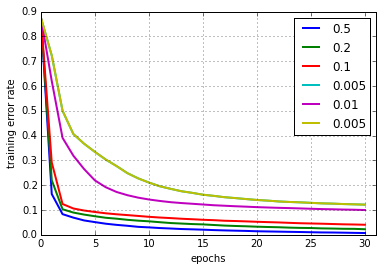

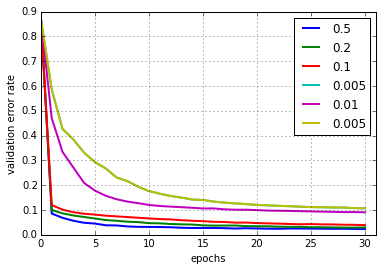

---TABLE---
For eta 0.5	 accuracy on test set is 0.9776
For eta 0.2	 accuracy on test set is 0.9691
For eta 0.1	 accuracy on test set is 0.9588
For eta 0.005	 accuracy on test set is 0.8864
For eta 0.01	 accuracy on test set is 0.9056
For eta 0.005	 accuracy on test set is 0.8864


In [41]:
%matplotlib inline
# include here the complete code that constructs the model, performs training,
# and prints the error and accuracy for train/valid/test
import matplotlib.pyplot as plt
import numpy
import logging


training_dict = {}
validation_dict = {}
test_dict = {}
etas = [0.5,0.2,0.1,0.005,0.01,0.005]
for eta in etas:

    logger = logging.getLogger()
    logger.setLevel(logging.INFO)

    from mlp.layers import MLP, Sigmoid, Softmax #import required layer types
    from mlp.optimisers import SGDOptimiser #import the optimiser
    from mlp.dataset import MNISTDataProvider #import data provider
    from mlp.costs import CECost #import the cost we want to use for optimisation
    from mlp.schedulers import LearningRateFixed

    rng = numpy.random.RandomState([2015,10,10])

    # define the model structure, here just one linear layer
    # and mean square error cost
    cost = CECost()
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
    model.add_layer(Softmax(idim=100, odim=10, rng=rng))
    #one can stack more layers here

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs as stopping criterion
    lr_scheduler = LearningRateFixed(learning_rate=eta, max_epochs=30)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.info('Initialising data providers...')
    train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
    valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

    logger.info('Training started...')
    # training results consist of the training cost and accuracy of each epoch
    # validation results consist of the validation cost and accuracy of each epoch
    training_results, validation_results = optimiser.train(model, train_dp, valid_dp)
    
    error_rate_t = map(lambda x: 1- x[1], training_results)
    error_rate_v = map(lambda x: 1- x[1], validation_results)    
    training_dict[eta] = error_rate_t
    validation_dict[eta] = error_rate_v

    logger.info('Testing the model on test set:')
    test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
    cost, accuracy = optimiser.validate(model, test_dp)
    test_dict[eta] = accuracy
    logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))

training_plot_list =  list()   
for eta in etas:    

    y1 = training_dict[eta]
    l = plt.plot( y1, lw=2)
    training_plot_list.append(l[0])

plt.legend(training_plot_list, etas)
plt.xlim(0.0, 31)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('training error rate')
plt.show()

validation_plot_list =  list()   
for eta in etas:    

    y1 = validation_dict[eta]
    l = plt.plot( y1, lw=2)
    validation_plot_list.append(l[0])

plt.legend(validation_plot_list, etas)
plt.xlim(0.0, 31)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('validation error rate')
plt.show()

print "---TABLE---"
for eta in etas:
    print "For eta " + str(eta) + '\t accuracy on test set is ' + str(test_dict[eta])
    

**(c)** (10%) Plot the following graphs:
  * Display the 784-element weight vector of each of the 100 hidden units as 10x10 grid plot of 28x28 images, in order to visualise what features of the input they are encoding.  To do this, take the weight vector of each hidden unit, reshape to 28x28, and plot using the `imshow` function).
  * Plot a Hinton Diagram of the output layer weight matrix for digits 0 and 1

INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.344. Accuracy is 12.43%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.344. Accuracy is 12.92%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.214. Accuracy is 37.89%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.105. Accuracy is 55.60%
INFO:mlp.optimisers:Epoch 1: Took 5 seconds. Training speed 11876 pps. Validation speed 32258 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 1.978. Accuracy is 60.91%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 1.818. Accuracy is 66.04%
INFO:mlp.optimisers:Epoch 2: Took 5 seconds. Training speed 11876 pps. Validation speed 31250 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 1.660. Accuracy is 68.08%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 1.472. Accuracy is 73.57%
INFO:mlp.optimisers:Epoch 3: Took 5 seconds. Training speed 11905 pps. Va

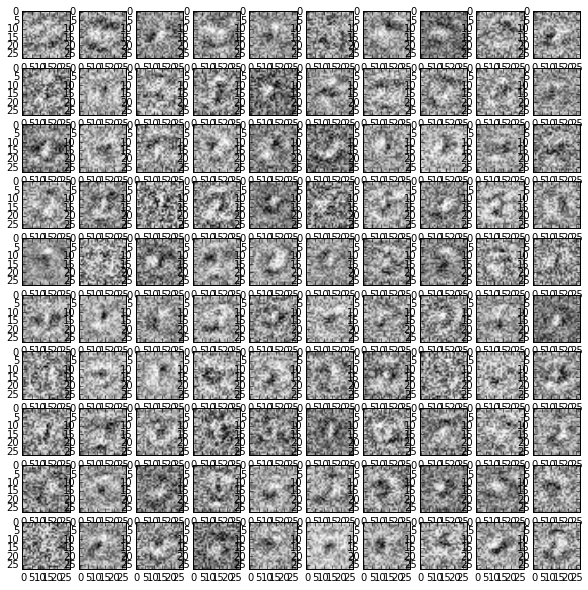

In [12]:
%matplotlib inline

# as specified by Steve in his email
# we are allowed to use the matplotlib code for Hinton diagrams
# code accessed from the link form the email
# http://matplotlib.org/examples/specialty_plots/hinton_demo.html accessed on 29/10/2015

import numpy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from mlp.dataset import MNISTDataProvider
import numpy
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

from mlp.layers import MLP, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

rng = numpy.random.RandomState([2015,10,10])

# define the model structure, here just one signmoid layer
# and a softmax layer
# and mean square error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
model.add_layer(Softmax(idim=100, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.01, max_epochs=30)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
optimiser.train(model, train_dp, valid_dp)

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))

# plot output layer weights
weights = model.layers[0].W.T

# modifying code from lab 00
fig = plt.figure()
fif, axarr = plt.subplots(10, 10, figsize = (10,10))
for i in xrange(0,10):
    for j in xrange(0,10):
        k = i*10 + j
        axarr[i,j].imshow(weights[k].reshape(28,28), cmap=cm.Greys_r)
plt.show()

#plot Hinton diagrams

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**numpy.ceil(numpy.log(numpy.abs(matrix).max())/numpy.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x,y),w in numpy.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = numpy.sqrt(numpy.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

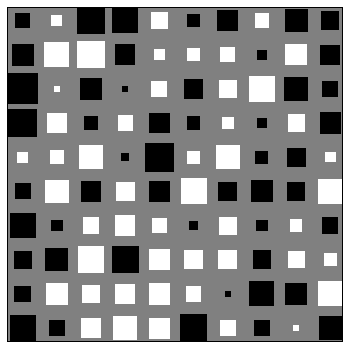

In [37]:
%matplotlib inline
# Hinton for digit 0
weights = model.layers[1].W.T[0].reshape(10,10)
plt.figure(figsize=(6,6))
hinton(weights)
plt.show()


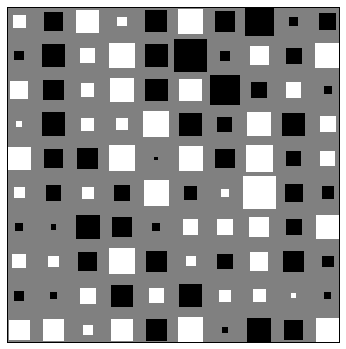

In [36]:
%matplotlib inline
# Hinton for digit 1
weights = model.layers[1].W.T[1].reshape(10,10)
plt.figure(figsize=(6,6))
hinton(weights)

## Task 4 - Experiments with 1-5 hidden layers (30%)

In this task use the learning rate which resulted in the best accuracy in your experiments in Task 3 (b).  Perform the following experiments:

  * Train a similar model to Task 3, with one hidden layer, but with 800 hidden units. 
  * Train 4 additional models with 2, 3, 4 and 5 hidden layers.  Set the number of hidden units for each model, such that all the models have similar number of trainable weights ($\pm$2%).   For simplicity, for a given model, keep the number of units in each hidden layer the same.
  * Plot value of the error function for training and validation sets as a function of training epochs for each model
  * Plot the test set classification accuracy as a function of the number of hidden layers


INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.479. Accuracy is 9.29%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.468. Accuracy is 9.79%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.789. Accuracy is 84.12%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.303. Accuracy is 91.12%
INFO:mlp.optimisers:Epoch 1: Took 30 seconds. Training speed 1808 pps. Validation speed 5405 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.298. Accuracy is 91.14%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.263. Accuracy is 92.20%
INFO:mlp.optimisers:Epoch 2: Took 30 seconds. Training speed 1754 pps. Validation speed 5587 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.253. Accuracy is 92.61%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.217. Accuracy is 93.78%
INFO:mlp.optimisers:Epoch 3: Took 29 seconds. Training speed 1866 pps. Valida

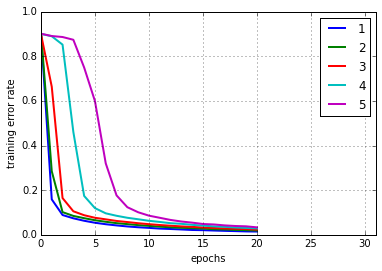

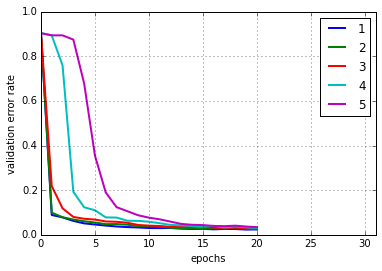

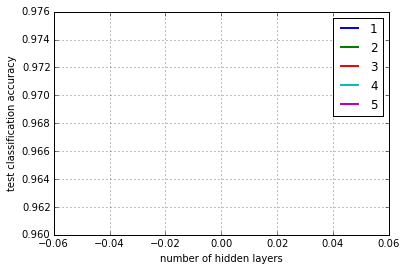

In [11]:
import numpy
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

from mlp.layers import MLP, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

rng = numpy.random.RandomState([2015,10,10])

# Decided with an awkward model naming convention as the number of hidden units as the model name
# seemed quite natural


training_dict = {}
validation_dict = {}
test_dict = {}
model_names = [1,2,3,4,5]

# model #1 is the 1 hidden layer 800 hidden sensor model


model_name = 1
# define the model structure
# and ce error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=800, rng=rng))
model.add_layer(Softmax(idim=800, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=20)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
training_results, validation_results = optimiser.train(model, train_dp, valid_dp)

error_rate_t = map(lambda x: 1- x[1], training_results)
error_rate_v = map(lambda x: 1- x[1], validation_results)    
training_dict[model_name] = error_rate_t
validation_dict[model_name] = error_rate_v

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
test_dict[model_name] = accuracy
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))


# model #2 is the 2 hidden layers 800 hidden sensor on each hidden layer model


model_name = 2
# define the model structure
# and ce error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Softmax(idim=800, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=20)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
training_results, validation_results = optimiser.train(model, train_dp, valid_dp)

error_rate_t = map(lambda x: 1- x[1], training_results)
error_rate_v = map(lambda x: 1- x[1], validation_results)    
training_dict[model_name] = error_rate_t
validation_dict[model_name] = error_rate_v

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
test_dict[model_name] = accuracy
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))


# model #3 is the 3 hidden layers 800 hidden sensor on each hidden layer model


model_name = 3
# define the model structure
# and ce error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Softmax(idim=800, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=20)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
training_results, validation_results = optimiser.train(model, train_dp, valid_dp)

error_rate_t = map(lambda x: 1- x[1], training_results)
error_rate_v = map(lambda x: 1- x[1], validation_results)    
training_dict[model_name] = error_rate_t
validation_dict[model_name] = error_rate_v

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
test_dict[model_name] = accuracy
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))


# model #4 is the 4 hidden layers 800 hidden sensor on each hidden layer model


model_name = 4
# define the model structure
# and ce error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Softmax(idim=800, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=20)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
training_results, validation_results = optimiser.train(model, train_dp, valid_dp)

error_rate_t = map(lambda x: 1- x[1], training_results)
error_rate_v = map(lambda x: 1- x[1], validation_results)    
training_dict[model_name] = error_rate_t
validation_dict[model_name] = error_rate_v

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
test_dict[model_name] = accuracy
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))


# model #5 is the 5 hidden layers 800 hidden sensor on each hidden layer model


model_name = 5
# define the model structure
# and ce error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Sigmoid(idim=800, odim=800, rng=rng))
model.add_layer(Softmax(idim=800, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=20)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
training_results, validation_results = optimiser.train(model, train_dp, valid_dp)

error_rate_t = map(lambda x: 1- x[1], training_results)
error_rate_v = map(lambda x: 1- x[1], validation_results)    
training_dict[model_name] = error_rate_t
validation_dict[model_name] = error_rate_v

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
test_dict[model_name] = accuracy
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))


training_plot_list =  list()   
for specific_model in model_names:    

    y1 = training_dict[specific_model]
    l = plt.plot( y1, lw=2)
    training_plot_list.append(l[0])

plt.legend(training_plot_list, model_names)
plt.xlim(0.0, 20)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('training error rate')
plt.show()

validation_plot_list =  list()   
for specific_model in model_names:    

    y1 = validation_dict[specific_model]
    l = plt.plot( y1, lw=2)
    validation_plot_list.append(l[0])

plt.legend(validation_plot_list, model_names)
plt.xlim(0.0, 20)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('validation error rate')
plt.show()

test_plot_list = list()
for specific_model in model_names:
    
    y1 = test_dict[specific_model]
    l = plt.plot( y1, lw=2)
    test_plot_list.append(l[0])

plt.legend(test_plot_list, model_names)
plt.grid()
plt.xlabel('number of hidden layers')
plt.ylabel('test classification accuracy')
plt.show()

This is the end of coursework 1.

Please remember to save your notebook, and submit your notebook following the instructions at the top.  Please make sure that you have executed all the code cells when you submit the notebook.
